In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('pred_data.csv')

In [3]:
data

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648
...,...,...
10095,0.0,0.474401
10096,0.0,0.128403
10097,0.0,0.499331
10098,0.0,0.157616


In [5]:
data['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [6]:
data['y_pred'] = data['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0)

In [7]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [9]:
conf_matrix = confusion_matrix(data['y'],data['y_pred'])
conf_matrix

array([[9761,  239],
       [  45,   55]], dtype=int64)

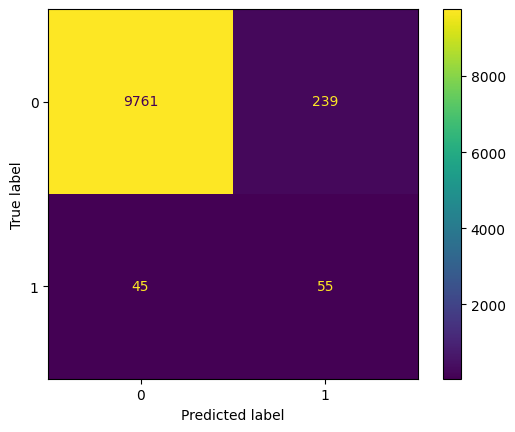

In [11]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [14]:
np.diag(conf_matrix).sum()/np.sum(conf_matrix)

0.9718811881188119

In [15]:
y_pred = np.zeros(len(data['y']))

In [16]:
conf_matrix = confusion_matrix(data['y'],y_pred)
conf_matrix

array([[10000,     0],
       [  100,     0]], dtype=int64)

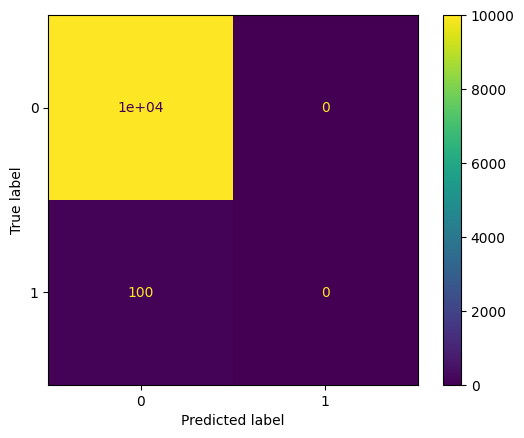

In [17]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [24]:
# TP for class 1

tp = conf_matrix[1,1]
print(f'tp : {tp}')

pred_pos = conf_matrix[:,1].sum() + 1e-4
print(f'pred_pos : {pred_pos}')

tp : 0
pred_pos : 0.0001


In [25]:
precision = tp/pred_pos
print(precision)

0.0


In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [27]:
precision_score(data['y'],y_pred)

C:\Users\gaura\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [28]:
precision_score(data['y'],data['y_pred'])

0.1870748299319728

In [31]:
recall_score(data['y'],data['y_pred']) # recall for random model

0.55

In [33]:
recall_score(data['y'],y_pred) # recall for dumb model

0.0

In [36]:
precision = precision_score(data['y'],data['y_pred'])
recall = recall_score(data['y'],data['y_pred'])
f1_score = 2*(precision  * recall)/(precision  + recall)
print(f1_score)

0.2791878172588833


In [38]:
f1_score(data['y'],data['y_pred'])

0.2791878172588833

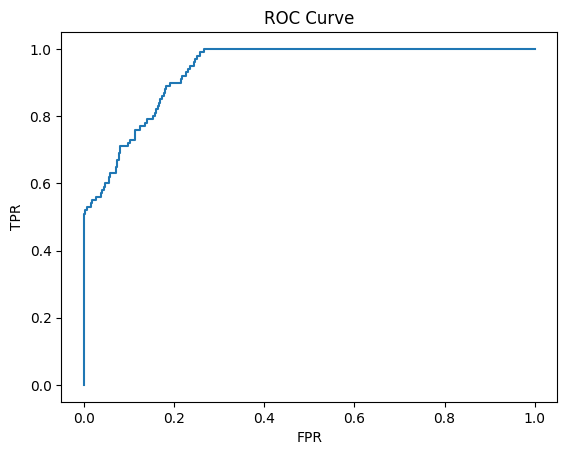

In [62]:
from sklearn.metrics import roc_curve , roc_auc_score
import matplotlib.pyplot as plt

fpr , tpr , thr = roc_curve(data['y'],(data['proba']))
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

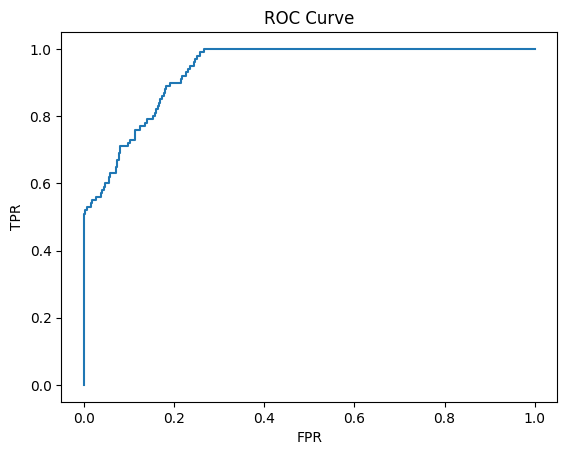

In [64]:
fpr_sq , tpr_sq , thr_sq = roc_curve(data['y'],np.sqrt(data['proba']))
plt.plot(fpr_sq,tpr_sq)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [65]:
tpr == tpr_sq

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [60]:
print(thr)

[1.7715531  0.7715531  0.71432814 0.71394953 0.71389608 0.71325391
 0.71325139 0.7120658  0.71206154 0.70940231 0.70940182 0.70907156
 0.70906691 0.70637292 0.70635671 0.70279895 0.70277595 0.70216988
 0.7021417  0.70047245 0.70043409 0.70021581 0.70020477 0.69700636
 0.69699647 0.6969732  0.69697309 0.69657481 0.69655972 0.69273865
 0.69269717 0.69244343 0.69243399 0.69200814 0.69197555 0.69191275
 0.69184243 0.69098958 0.69098953 0.69072087 0.69071486 0.69013265
 0.69011697 0.68981094 0.68980844 0.68545814 0.68543927 0.68376124
 0.6836989  0.68082746 0.68078603 0.68035598 0.68034531 0.68024794
 0.68023714 0.67730079 0.6772911  0.67379399 0.67374726 0.67202695
 0.67197687 0.66874281 0.66873238 0.66691798 0.66690013 0.66669108
 0.6666811  0.66525459 0.66521555 0.66461566 0.66454564 0.6642888
 0.66428466 0.66299236 0.66296217 0.66167337 0.66164379 0.66081228
 0.66080731 0.66033734 0.66033155 0.65755896 0.65750362 0.65026315
 0.65022303 0.64968187 0.64967183 0.64701293 0.64695285 0.64536

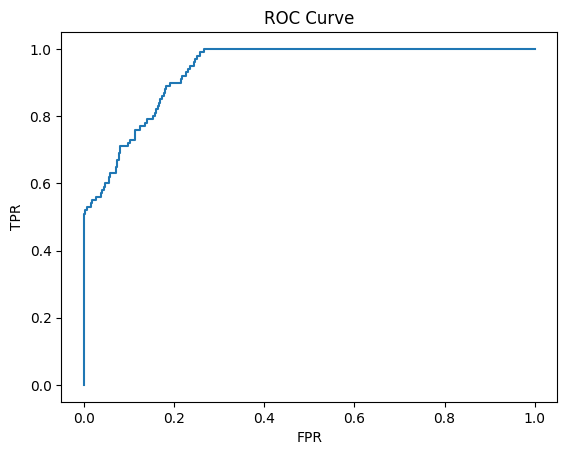

In [44]:
roc_auc_score(data['y'],data['proba'])

0.9377570000000001

In [45]:
from sklearn.metrics import precision_recall_curve , auc

In [46]:
precision , recall , thr = precision_recall_curve(data['y'],data['proba'])

In [48]:
print(thr,len(thr))

[0.10000141 0.1001608  0.10016508 ... 0.59219787 0.5948084  0.59529418] 10100


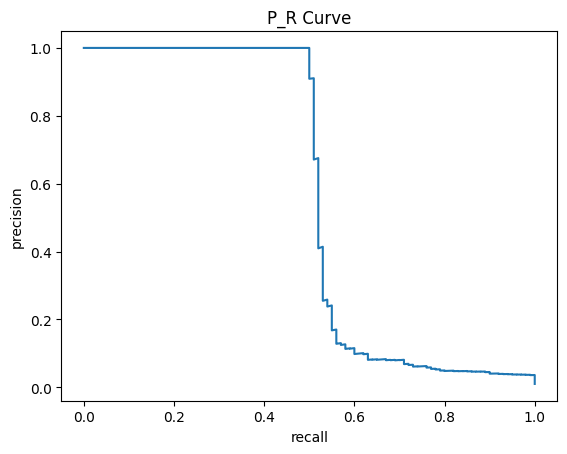

In [50]:
plt.plot(recall,precision)
plt.title('P_R Curve')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [52]:
auc(recall,precision)

0.554765146410734